# Communities-First Ordering and Centrality-Metrics Ordering

### Testing Communities First Ordering 

In [1]:
from data.graph_data import *
import ba_utils.visualization as visualization
import ba_utils.orderings as orderings
import ba_utils.neighborhoods as neighborhoods

import networkx as nx
from community import community_louvain
import heapq
import matplotlib.pyplot as plt

def draw_all_orderings(graphs, data):
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))

    bfs_ordering = orderings.get_BFS_ordering(graphs, sorting_key='common_neighbors')
    visualization.draw_rug_plot_with_ids(data, bfs_ordering, ax=axes[0])
    axes[0].set_title("BFS: Common Neighbors")

    bfs_ordering = orderings.get_BFS_ordering(graphs, sorting_key='weight')
    visualization.draw_rug_plot_with_ids(data, bfs_ordering, ax=axes[1])
    axes[1].set_title("BFS: Weight")
    
    bfs_ordering = orderings.get_BFS_ordering(graphs, sorting_key='weight_desID')
    visualization.draw_rug_plot_with_ids(data, bfs_ordering, ax=axes[2])
    axes[2].set_title("BFS:Weight_descending ID")

    bfs_ordering = orderings.get_BFS_ordering(graphs, sorting_key='id')
    visualization.draw_rug_plot_with_ids(data, bfs_ordering, ax=axes[3])
    axes[3].set_title("BFS: ID")
    
    degree_ordering = orderings.get_degree_ordering(graphs)
    visualization.draw_rug_plot_with_ids(data, degree_ordering, ax=axes[4])
    axes[4].set_title("Degree")
    
    dfs_ordering = orderings.get_DFS_ordering(graphs)
    visualization.draw_rug_plot_with_ids(data, dfs_ordering, ax=axes[5])
    axes[5].set_title("DFS")

    plt.tight_layout()
    return fig


{'t_1905': {'nodes': [{'id': 8, 'name': 'Artist 8', 'num_exhibitions': 3}, {'id': 21, 'name': 'Artist 21', 'num_exhibitions': 2}, {'id': 2, 'name': 'Artist 2', 'num_exhibitions': 4}, {'id': 15, 'name': 'Artist 15', 'num_exhibitions': 6}, {'id': 9, 'name': 'Artist 9', 'num_exhibitions': 2}, {'id': 22, 'name': 'Artist 22', 'num_exhibitions': 2}, {'id': 3, 'name': 'Artist 3', 'num_exhibitions': 4}, {'id': 16, 'name': 'Artist 16', 'num_exhibitions': 7}, {'id': 10, 'name': 'Artist 10', 'num_exhibitions': 3}, {'id': 23, 'name': 'Artist 23', 'num_exhibitions': 2}, {'id': 4, 'name': 'Artist 4', 'num_exhibitions': 3}, {'id': 17, 'name': 'Artist 17', 'num_exhibitions': 6}, {'id': 11, 'name': 'Artist 11', 'num_exhibitions': 6}, {'id': 24, 'name': 'Artist 24', 'num_exhibitions': 1}, {'id': 5, 'name': 'Artist 5', 'num_exhibitions': 3}, {'id': 18, 'name': 'Artist 18', 'num_exhibitions': 3}, {'id': 19, 'name': 'Artist 19', 'num_exhibitions': 2}, {'id': 12, 'name': 'Artist 12', 'num_exhibitions': 6}, 

In [2]:
def get_community_ordering(graphs, sorting_key='id'):
    """
    Get the node ordering based on community detection for each graph.

    Args:
        graphs (dict): A dictionary of NetworkX graphs for each timestamp.
        sorting_key (str, optional): The key to sort nodes within each community ('id' or 'degree').

    Returns:
        dict: A dictionary containing community-based ordering of nodes for each graph.
    """
    neighborhoods_ordering = {}

    for timestamp, graph in graphs.items():
        # Detect communities using the Louvain method
        partition = community_louvain.best_partition(graph)

        # Create a dictionary to hold nodes for each community
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Sort nodes within each community based on the sorting_key
        for community in communities:
            if sorting_key == 'id':
                communities[community] = sorted(communities[community])
            elif sorting_key == 'degree':
                communities[community] = sorted(communities[community], key=lambda node: (-graph.degree(node), node))

        # Combine the sorted nodes from all communities
        sorted_nodes = []
        for community in sorted(communities.keys()):
            sorted_nodes.extend(communities[community])

        neighborhoods_ordering[timestamp] = sorted_nodes

    return neighborhoods_ordering

Communities First Ordering {0: [1, 2, 3, 5, 4, 6, 7]}


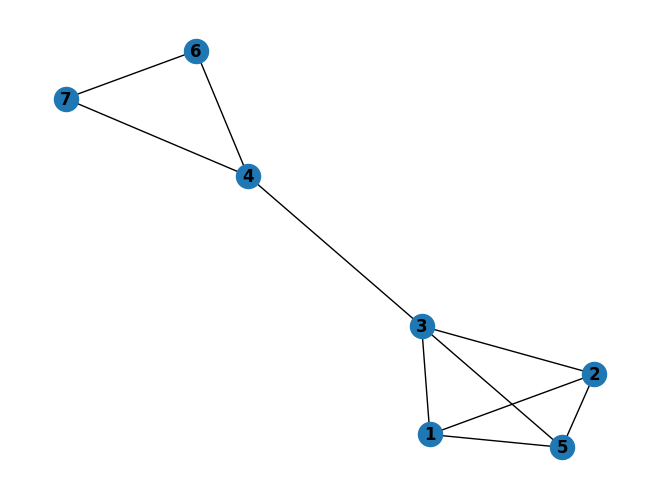

In [3]:
G = nx.Graph()
G.add_edge(1, 2, weight=1)
G.add_edge(1, 3, weight=1)
G.add_edge(1, 5, weight=1)
G.add_edge(2, 3, weight=1)
G.add_edge(3, 4, weight=1)
G.add_edge(3, 5, weight=1)
G.add_edge(2, 5, weight=1)
G.add_edge(4, 6, weight=1)
G.add_edge(7, 4, weight=1)
G.add_edge(7, 6, weight=1)

nx.draw(G, with_labels=True, font_weight='bold')
print("Communities First Ordering", get_community_ordering({0: G}))

Communities First Ordering {0: [1, 2, 3, 5, 24, 17, 18, 19, 20, 21, 22, 23, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}


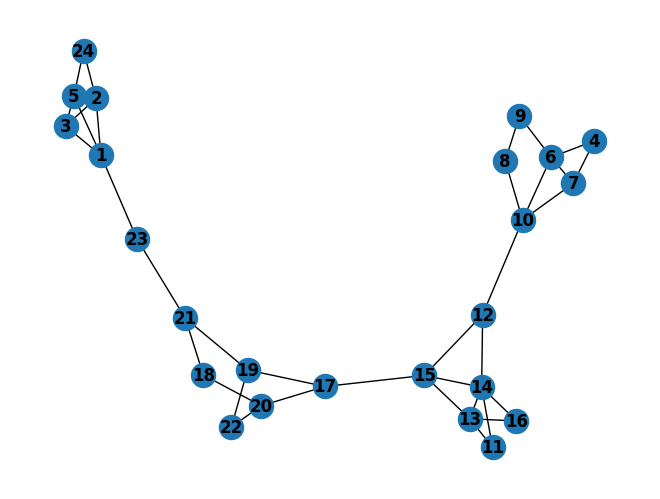

In [4]:
G2 = nx.Graph()
G2.add_edge(1, 2, weight=1)
G2.add_edge(1, 3, weight=1)
G2.add_edge(1, 5, weight=1)
G2.add_edge(2, 3, weight=1)
G2.add_edge(3, 5, weight=1)
G2.add_edge(2, 5, weight=1)
G2.add_edge(4, 6, weight=1)
G2.add_edge(7, 4, weight=1)
G2.add_edge(7, 6, weight=1)
# Adding more nodes and edges to create a bigger graph with 24 nodes and at least 4 different communities
G2.add_edges_from([
    (8, 9, {'weight': 1}), (8, 10, {'weight': 1}), 
    (10, 12, {'weight': 1}), (11, 13, {'weight': 1}), (12, 14, {'weight': 1}),
    (13, 15, {'weight': 1}), (14, 16, {'weight': 1}), (15, 17, {'weight': 1}),
    (17, 19, {'weight': 1}), (18, 20, {'weight': 1}),
    (19, 21, {'weight': 1}), (20, 22, {'weight': 1}), (21, 23, {'weight': 1}), 
    (23, 1, {'weight': 1}), (24, 2, {'weight': 1}),
     (6, 9, {'weight': 1}), (7, 10, {'weight': 1}), (14,15, {'weight': 1}),
    (11, 14, {'weight': 1}), (12, 15, {'weight': 1}), (13, 16, {'weight': 1}),
    (17, 20, {'weight': 1}), (18, 21, {'weight': 1}), (19, 22, {'weight': 1}),
     (24, 5, {'weight': 1}), (10, 6, {'weight': 1}), (13,14, {'weight': 1}),
])

nx.draw(G2, with_labels=True, font_weight='bold')
print("Communities First Ordering", get_community_ordering({0: G2}))

### Testing Centrality Measure Ordering

In [5]:
def get_centrality_ordering(graphs, centrality_measure='degree', reverse=False):
    """
    Get the node ordering based on centrality measures for each graph.

    Args:
        graphs (dict): A dictionary of NetworkX graphs for each timestamp.
        centrality_measure (str, optional): The centrality measure to use ('degree', 'closeness', 'betweenness', 'eigenvector').
        reverse (bool, optional): Whether to reverse the ordering based on centrality. Defaults to descending (most central first).

    Returns:
        dict: A dictionary containing centrality-based ordering of nodes for each graph.
    """
    centrality_ordering = {}

    for timestamp, graph in graphs.items():
        # Compute centrality based on the selected measure
        if centrality_measure == 'degree':
            centrality = nx.degree_centrality(graph)
        elif centrality_measure == 'closeness':
            centrality = nx.closeness_centrality(graph)
        elif centrality_measure == 'betweenness':
            centrality = nx.betweenness_centrality(graph)
        elif centrality_measure == 'eigenvector':
            centrality = nx.eigenvector_centrality(graph, max_iter=10000, tol=1e-6, weight='weight')
        else:
            raise ValueError("Invalid centrality measure specified.")

        # Sort by centrality (descending) and by ID (ascending)
        sorted_nodes = sorted(
            graph.nodes,
            key=lambda node: (-centrality[node], node) if not reverse else (centrality[node], node)
        )
        centrality_ordering[timestamp] = sorted_nodes

    return centrality_ordering



In [6]:
def print_graph_metrics(graph):
    """
    Print metrics for each node in the graph in a formatted table.

    Parameters:
        graph (networkx.Graph): The input graph.
    """
    # Print headers
    print(f"{'Node':<10}{'Betweenness':<20}{'Degree':<15}{'Degree Centrality':<20}{'Eigenvector':<20}")
    print("-" * 85)

    # Precompute centrality measures to avoid recomputation
    betweenness = nx.betweenness_centrality(graph)
    degree_centrality = nx.degree_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=10000, tol=1e-6)

    # Print metrics for each node
    for node in graph.nodes:
        print(f"{node:<10}{round(betweenness[node], 3):<20}{graph.degree(node):<15}"
              f"{round(degree_centrality[node], 3):<20}{round(eigenvector_centrality[node], 3):<20}")

print_graph_metrics(G2)

Node      Betweenness         Degree         Degree Centrality   Eigenvector         
-------------------------------------------------------------------------------------
1         0.3                 4              0.174               0.101               
2         0.042               4              0.174               0.106               
3         0.0                 3              0.13                0.092               
5         0.042               4              0.174               0.106               
4         0.0                 2              0.087               0.067               
6         0.086               4              0.174               0.121               
7         0.039               3              0.13                0.108               
8         0.038               2              0.087               0.069               
9         0.003               2              0.087               0.056               
10        0.364               4              0.174    

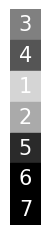

In [7]:
centrality_ordering = get_centrality_ordering({"t_1905": G}, centrality_measure='betweenness')

data = {
    "t_1905": {
        "nodes": [{"id": n, "name": f"Artist {n}", "num_exhibitions": G.degree[n]} for n in G.nodes],
        "links": [{"source": u, "target": v, "weight": d['weight'], "influence": 0.0} for u, v, d in G.edges(data=True)],
        "num_exhibitions": max(G.degree[n] for n in G.nodes)
    }
}

visualization.draw_rug_plot_with_ids(data, centrality_ordering)


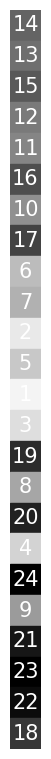

In [8]:
community_ordering = orderings.get_community_ordering({"t_1905": G}, "degree")
centrality_ordering = get_centrality_ordering({"t_1905": G2}, centrality_measure='eigenvector')

data = {
    "t_1905": {
        "nodes": [{"id": n, "name": f"Artist {n}", "num_exhibitions": G2.degree[n]} for n in G2.nodes],
        "links": [{"source": u, "target": v, "weight": d['weight'], "influence": 0.0} for u, v, d in G2.edges(data=True)],
        "num_exhibitions": max(G2.degree[n] for n in G2.nodes)
    }
}

visualization.draw_rug_plot_with_ids(data, centrality_ordering)


In [9]:
print("BFS Ordering by Weight:")
print(orderings.get_BFS_ordering({0: G}, sorting_key='weight'))

print("\nBFS Ordering by Weight Descending ID:")
print(orderings.get_BFS_ordering({0: G}, sorting_key='weight_desID'))

print("\nBFS Ordering by Common Neighbors:")
print(orderings.get_BFS_ordering({0: G}, sorting_key='common_neighbors'))

print("\nBFS Ordering by ID:")
print(orderings.get_BFS_ordering({0: G}, sorting_key='id'))

print("\nDegree Ordering:")
print(orderings.get_degree_ordering({0: G}))

print("\nDFS Ordering:")
print(orderings.get_DFS_ordering({0: G}))

print("\nCentrality Ordering:")
print(get_centrality_ordering({0: G}, centrality_measure='betweenness'))


BFS Ordering by Weight:
Graphs received: {0: <networkx.classes.graph.Graph object at 0x000001A2315E9520>}
{0: [1, 2, 3, 5, 4, 6, 7]}

BFS Ordering by Weight Descending ID:
Graphs received: {0: <networkx.classes.graph.Graph object at 0x000001A2315E9520>}
{0: [1, 5, 3, 2, 4, 7, 6]}

BFS Ordering by Common Neighbors:
Graphs received: {0: <networkx.classes.graph.Graph object at 0x000001A2315E9520>}
{0: [1, 2, 3, 5, 4, 6, 7]}

BFS Ordering by ID:
Graphs received: {0: <networkx.classes.graph.Graph object at 0x000001A2315E9520>}
{0: [1, 2, 3, 5, 4, 6, 7]}

Degree Ordering:
{0: [3, 1, 2, 4, 5, 6, 7]}

DFS Ordering:
Graphs received: {0: <networkx.classes.graph.Graph object at 0x000001A2315E9520>}
{0: [1, 2, 3, 4, 6, 7, 5]}

Centrality Ordering:
{0: [3, 4, 1, 2, 5, 6, 7]}


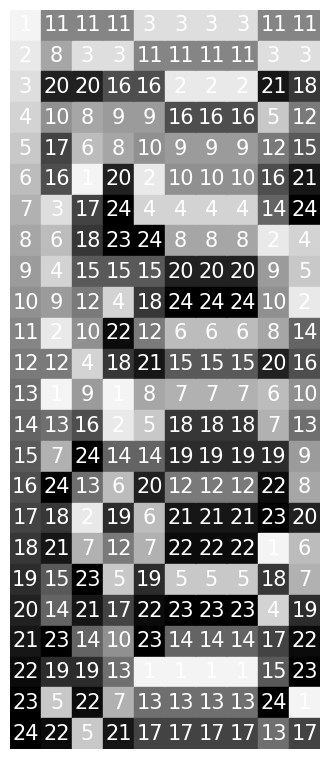

In [10]:
centrality_ordering = orderings.get_centrality_ordering(trend_graphs, centrality_measure='eigenvector')
fig = visualization.draw_rug_plot_with_ids(trend_data, centrality_ordering)

Graphs received: {'t_1905': <networkx.classes.graph.Graph object at 0x000001A2316CF050>, 't_1906': <networkx.classes.graph.Graph object at 0x000001A2316CF080>, 't_1907': <networkx.classes.graph.Graph object at 0x000001A2316CF110>, 't_1909': <networkx.classes.graph.Graph object at 0x000001A2316CF170>, 't_1910': <networkx.classes.graph.Graph object at 0x000001A2316CF1D0>, 't_1911': <networkx.classes.graph.Graph object at 0x000001A2316CF230>, 't_1912': <networkx.classes.graph.Graph object at 0x000001A2316CF290>, 't_1913': <networkx.classes.graph.Graph object at 0x000001A2316CF2F0>, 't_1914': <networkx.classes.graph.Graph object at 0x000001A2316CF350>, 't_1915': <networkx.classes.graph.Graph object at 0x000001A2316CF3E0>}
Graphs received: {'t_1905': <networkx.classes.graph.Graph object at 0x000001A2316CF050>, 't_1906': <networkx.classes.graph.Graph object at 0x000001A2316CF080>, 't_1907': <networkx.classes.graph.Graph object at 0x000001A2316CF110>, 't_1909': <networkx.classes.graph.Graph o

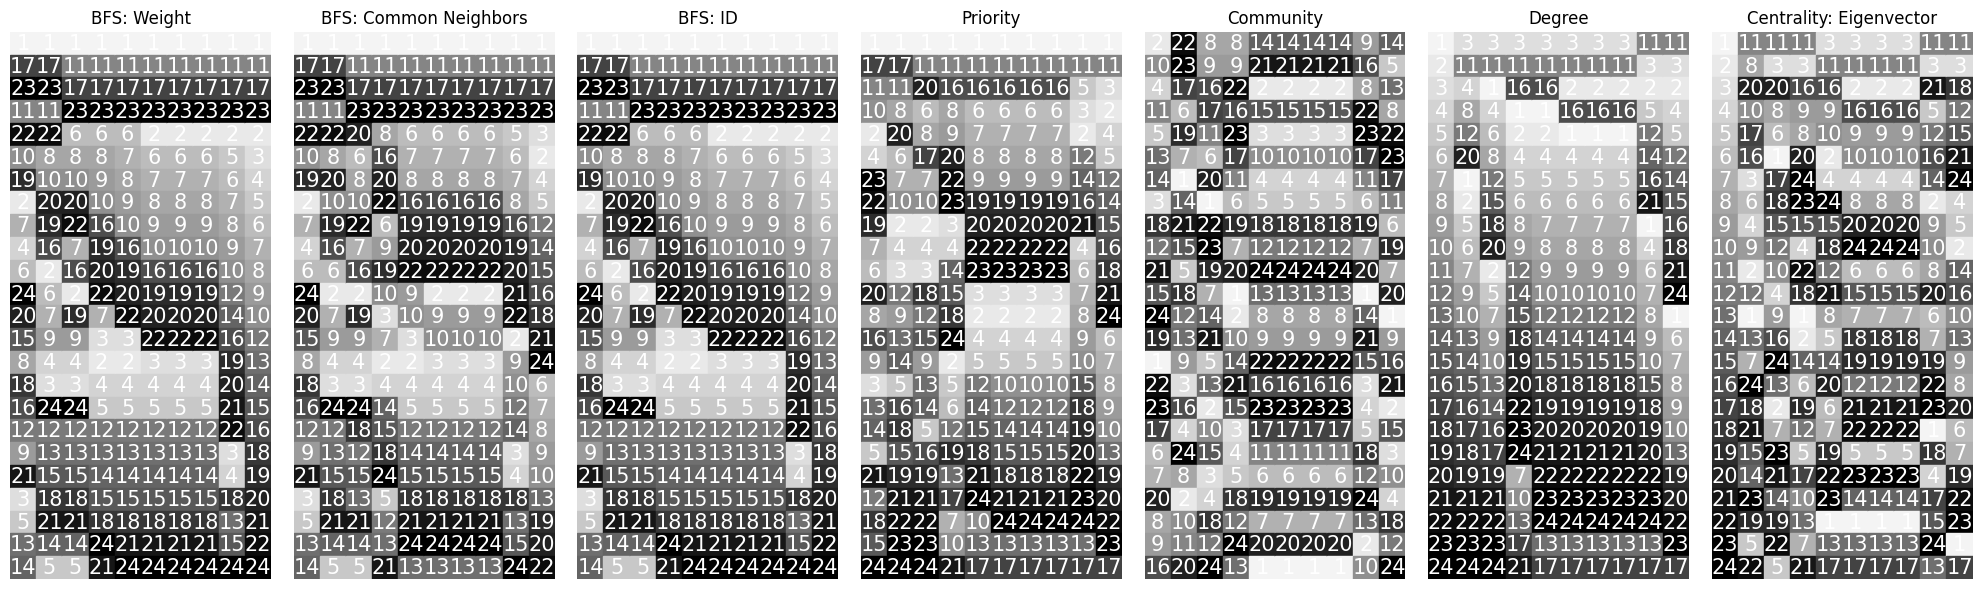

In [11]:
fig = visualization.draw_all_orderings(trend_graphs, trend_data)